<a href="https://colab.research.google.com/github/Mmbsaksd/Customer-segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Feature Engineering**

##**Importing**

In [3]:
#Importing the essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Loading the datasets
df = pd.read_csv('/content/Online_Retail.xlsx - Online Retail.csv')


##**Data Inspection**

In [5]:
#First Look
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [6]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
#Checking shape
df.shape

(541909, 8)

In [8]:
#Checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
#Checking the statistical discribtion
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/11 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


##**Handling Missing Data**

In [10]:
from pandas.core import missing
#Missing value count Function
def show_missing():
  missing = df.columns[df.isnull().any()].tolist()
  return missing

#Missing data count and percentage
print("Missing Data Count")
print(df[show_missing()].isnull().sum().sort_values(ascending=False))
print('--'*50)
print('Missing Data Percentage')
print(round(df[show_missing()].isnull().sum().sort_values(ascending=False)/len(df)*100,2))

Missing Data Count
CustomerID     135080
Description      1454
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
CustomerID     24.93
Description     0.27
dtype: float64


In [11]:
#Handling the missing values
#Customer id is irrelavant so dropping
#df.drop('CustomerID', axis=1, inplace=True)

#Description cant be imputed by mesuare of tendancy
#So dropping null value row
df.dropna(inplace=True)

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [12]:
#Reconfirmation on null value
df.isnull().sum().sort_values(ascending=False)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

##**Removing Cancelled Rows**

In [13]:
#Converting invoice number columns into str
df['InvoiceNo'] = df['InvoiceNo'].astype(str)

#Remove row which are cancelled
df = df[~df['InvoiceNo'].str.contains('C')]

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


##**Date Columns Split**

In [14]:
#Extracting element from invoice date
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['WeekDay'] = df['InvoiceDate'].dt.day_name()
df['Month'] = df['InvoiceDate'].dt.month_name()
df['Day'] = df['InvoiceDate'].apply(lambda x: x.day)
df['Year'] = df['InvoiceDate'].apply(lambda x: x.year)
df['Hour'] = df['InvoiceDate'].apply(lambda x: x.hour)
df['Minute'] = df['InvoiceDate'].apply(lambda x: x.minute)


In [15]:
#Create total amount columns
df['Total_Amount'] = df['Quantity']*df['UnitPrice']

#DataFrame Look
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Month,Day,Year,Hour,Minute,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,20.34


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     397924 non-null  object        
 1   StockCode     397924 non-null  object        
 2   Description   397924 non-null  object        
 3   Quantity      397924 non-null  int64         
 4   InvoiceDate   397924 non-null  datetime64[ns]
 5   UnitPrice     397924 non-null  float64       
 6   CustomerID    397924 non-null  float64       
 7   Country       397924 non-null  object        
 8   WeekDay       397924 non-null  object        
 9   Month         397924 non-null  object        
 10  Day           397924 non-null  int64         
 11  Year          397924 non-null  int64         
 12  Hour          397924 non-null  int64         
 13  Minute        397924 non-null  int64         
 14  Total_Amount  397924 non-null  float64       
dtypes: datetime64[ns]

#**Explorative Data Analysis(EDA)**

In [17]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'WeekDay', 'Month', 'Day', 'Year',
       'Hour', 'Minute', 'Total_Amount'],
      dtype='object')

In [18]:
#Creating DataFrame on description and count
Description_df = df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index':'Description_Name'},inplace=True)
Description_df.rename(columns={'Description':'Count'}, inplace=True)
Description_df.head()

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1724
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1397


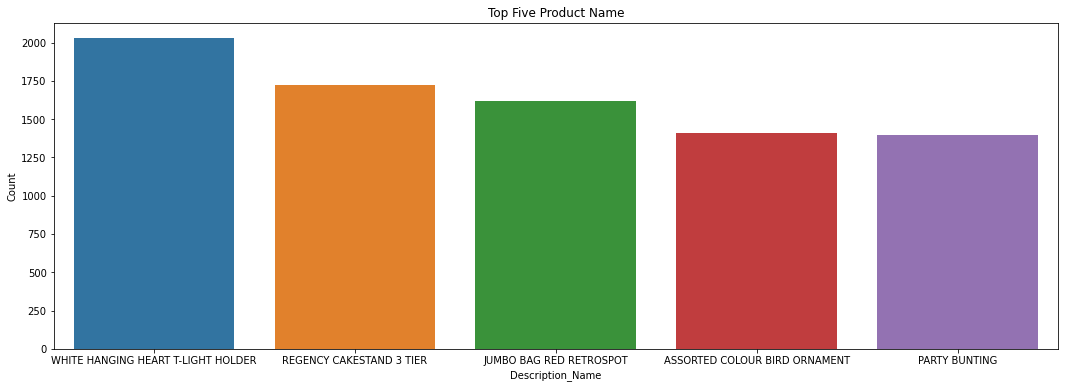

In [19]:
#Plotting on barplot
plt.figure(figsize=(18,6))
plt.title('Top Five Product Name')
sns.barplot(x='Description_Name',y='Count', data=Description_df[:5])

**Top Five product based on selling**


1.   Whit Hanging Heart Light Holder
2.   Regency Cake Stand 3 Tier
3.   Jumbo Bang Red Retrospect
4.   Assorted Colour Bird Arangment
5.   Party Bunting

In [20]:
#Printing last five rows
Description_df.tail()

,Description_Name,Count
3872,RUBY GLASS CLUSTER EARRINGS,1
3873,PINK CHRYSANTHEMUMS ART FLOWER,1
3874,72 CAKE CASES VINTAGE CHRISTMAS,1
3875,"WALL ART , THE MAGIC FOREST",1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


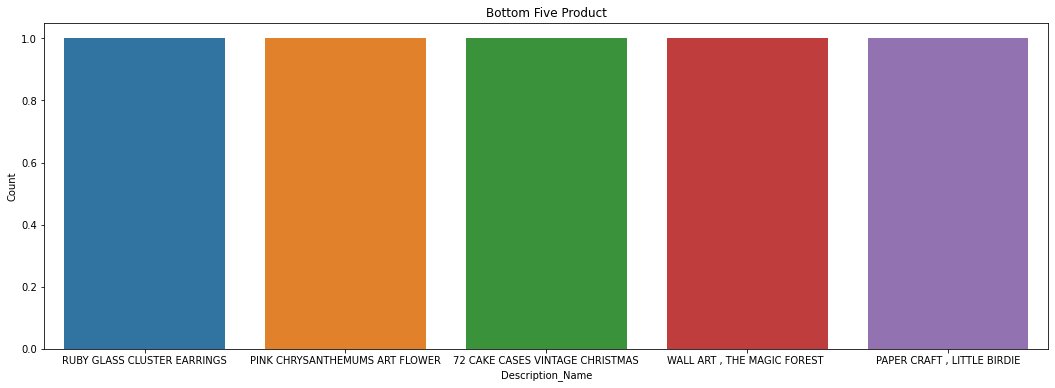

In [21]:
#Plotting bottom five Product Based On Selling
plt.figure(figsize=(18,6))
plt.title('Bottom Five Product')
sns.barplot(x='Description_Name',y='Count',data=Description_df[-5:])

**Bottom Five Product**

1.   Ruby GlassCluster Earning
2.   Pink Chrysanthemums Art Flower
3.   Cake Case Vintage Christmas
4    Wall Art The Magic Forest
5.   Paper Craft Little Birdie



In [22]:
#Creating the table of stock distribution
Stockcode_df = df['StockCode'].value_counts().reset_index()
Stockcode_df.rename(columns={'index':'StockCode_Name'},inplace=True)
Stockcode_df.rename(columns={'StockCode':'Count'},inplace=True)
Stockcode_df.head()

,StockCode_Name,Count
0,85123A,2035
1,22423,1724
2,85099B,1618
3,84879,1408
4,47566,1397


In [23]:
#Printing Bottom Five rows
Stockcode_df.tail()

,StockCode_Name,Count
3660,90168,1
3661,90169,1
3662,90202A,1
3663,90118,1
3664,23843,1


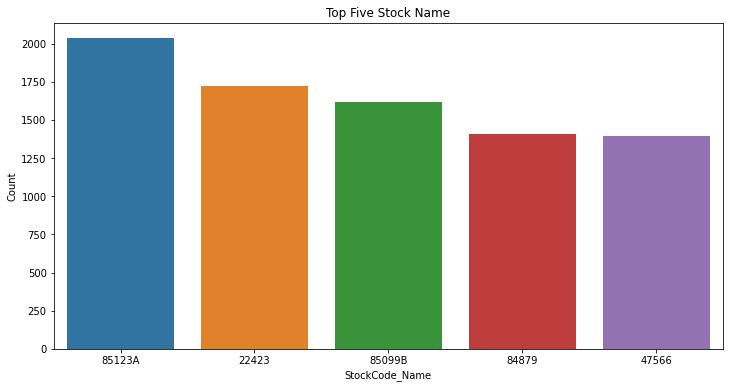

In [24]:
#Plotting Top Five Stock
plt.figure(figsize=(12,6))
plt.title('Top Five Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=Stockcode_df[:5])

**Top Five Stock Name**


1.   85123A
2.   22423
3.   85099B
4.   83879
5.   47566


In [25]:
#List of bottom 5 stockcode name
Stockcode_df.tail()

,StockCode_Name,Count
3660,90168,1
3661,90169,1
3662,90202A,1
3663,90118,1
3664,23843,1


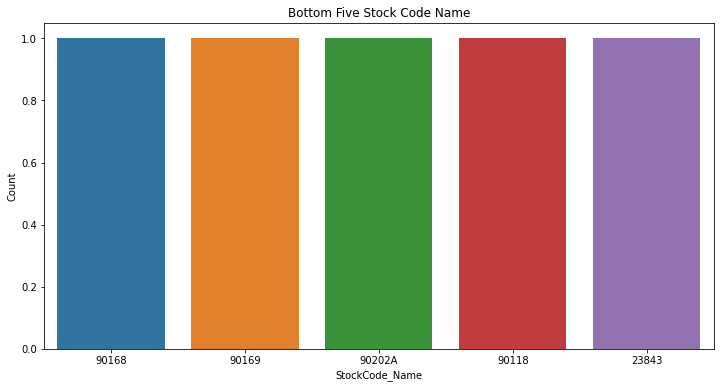

In [26]:
#Plotting bottom five stockcode name
plt.figure(figsize=(12,6))
plt.title('Bottom Five Stock Code Name')
sns.barplot(x='StockCode_Name',y='Count',data=Stockcode_df[-5:])

In [27]:
#Creating the table of countribution with its distribution
country_df = df['Country'].value_counts().reset_index()
country_df.rename(columns={'index':'Country_Name'},inplace=True)
country_df.rename(columns={'Country':'Count'},inplace=True)
country_df.head()

,Country_Name,Count
0,United Kingdom,354345
1,Germany,9042
2,France,8342
3,EIRE,7238
4,Spain,2485


In [28]:
#Print tail of countries distribution
country_df.tail()

,Country_Name,Count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


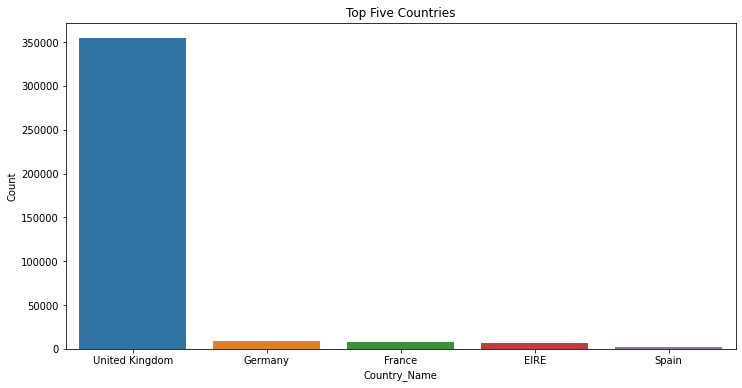

In [29]:
#Ploting top five countries
plt.figure(figsize=(12,6))
plt.title('Top Five Countries')
sns.barplot(x='Country_Name', y='Count',data=country_df[:5] )

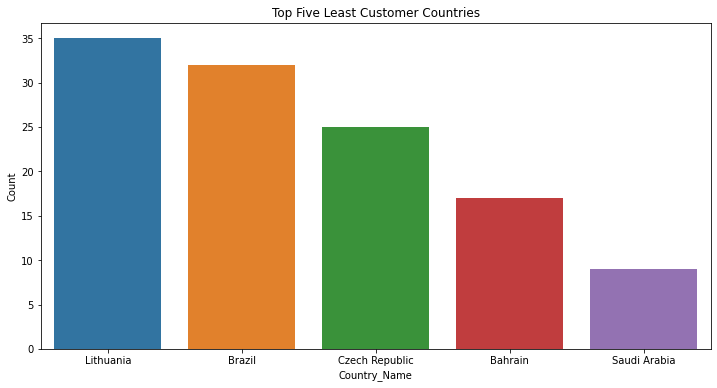

In [30]:
#Plotting top least customer countries
plt.figure(figsize=(12,6))
plt.title('Top Five Least Customer Countries')
sns.barplot(x='Country_Name',y='Count',data=country_df[-5:])

**Observation On Countries Distribution**

*   Most customer are belong to UK, then Germany, France, EIFE and Spain respectively
*   Least customer company are Greece, United Arab Emirate, Austria, Israel and Soudia Arabia


In [31]:
#Checking customer of soudia arabia
df[df['Country']=='Saudi Arabia']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Month,Day,Year,Hour,Minute,Total_Amount
100810,544838,22915,ASSORTED BOTTLE TOP MAGNETS,12,2011-02-24 10:34:00,0.42,12565.0,Saudi Arabia,Thursday,February,24,2011,10,34,5.04
100811,544838,22363,GLASS JAR MARMALADE,6,2011-02-24 10:34:00,2.95,12565.0,Saudi Arabia,Thursday,February,24,2011,10,34,17.70
100812,544838,22362,GLASS JAR PEACOCK BATH SALTS,6,2011-02-24 10:34:00,2.95,12565.0,Saudi Arabia,Thursday,February,24,2011,10,34,17.70
100813,544838,22361,GLASS JAR DAISY FRESH COTTON WOOL,6,2011-02-24 10:34:00,2.95,12565.0,Saudi Arabia,Thursday,February,24,2011,10,34,17.70
100814,544838,22553,PLASTERS IN TIN SKULLS,12,2011-02-24 10:34:00,1.65,12565.0,Saudi Arabia,Thursday,February,24,2011,10,34,19.80
100815,544838,22555,PLASTERS IN TIN STRONGMAN,12,2011-02-24 10:34:00,1.65,12565.0,Saudi Arabia,Thursday,February,24,2011,10,34,19.80
100816,544838,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-02-24 10:34:00,1.65,12565.0,Saudi Arabia,Thursday,February,24,2011,10,34,19.80
100817,544838,20781,GOLD EAR MUFF HEADPHONES,2,2011-02-24 10:34:00,5.49,12565.0,Saudi Arabia,Thursday,February,24,2011,10,34,10.98
100818,544838,22969,HOMEMADE JAM SCENTED CANDLES,12,2011-02-24 10:34:00,1.45,12565.0,Saudi Arabia,Thursday,February,24,2011,10,34,17.40


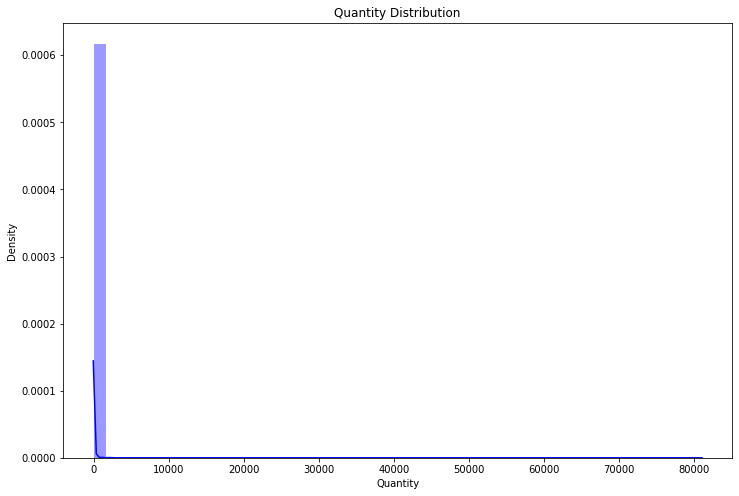

In [32]:
#Plotting Distribution of Quantity
plt.figure(figsize=(12,8))
plt.title("Quantity Distribution")
sns.distplot(df['Quantity'],color="B")

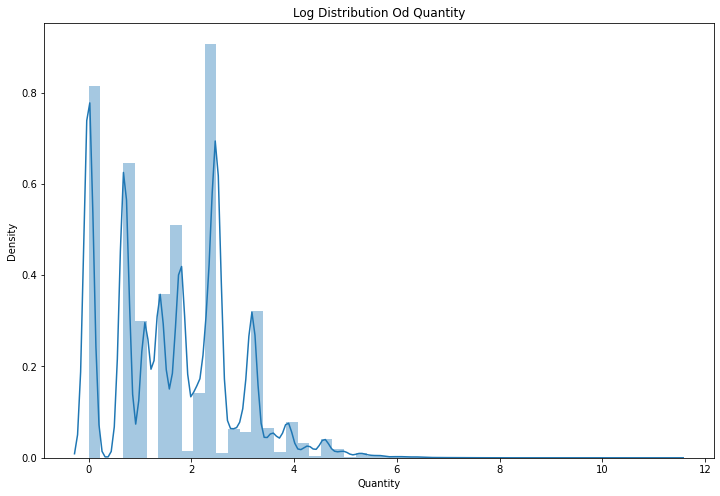

In [33]:
#Distribution Of Quantity with log
plt.figure(figsize=(12,8))
plt.title('Log Distribution Od Quantity')
sns.distplot(np.log(df['Quantity']))

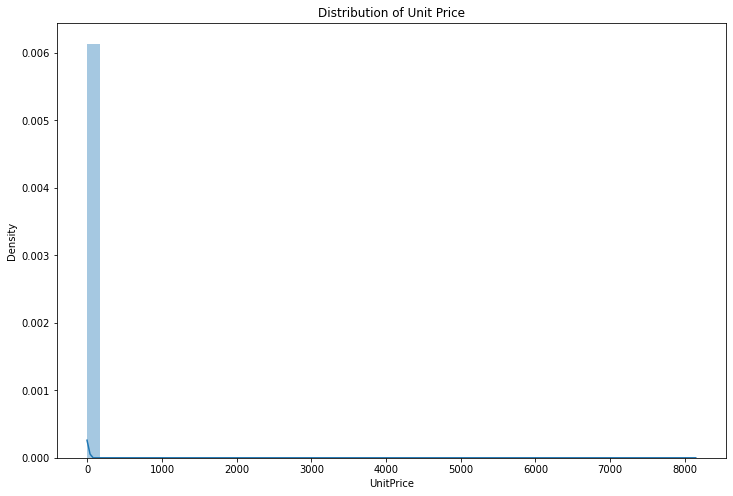

In [34]:
#Checking the disatribution of unitprice
plt.figure(figsize=(12,8))
plt.title('Distribution of Unit Price')
sns.distplot(df['UnitPrice'])

In [35]:
#Checking the dispersion of price unit
df['UnitPrice'].describe([0.75,0.90,0.95,0.99])

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
50%           1.950000
75%           3.750000
90%           6.350000
95%           8.500000
99%          14.950000
max        8142.750000
Name: UnitPrice, dtype: float64

In [36]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'WeekDay', 'Month', 'Day', 'Year',
       'Hour', 'Minute', 'Total_Amount'],
      dtype='object')

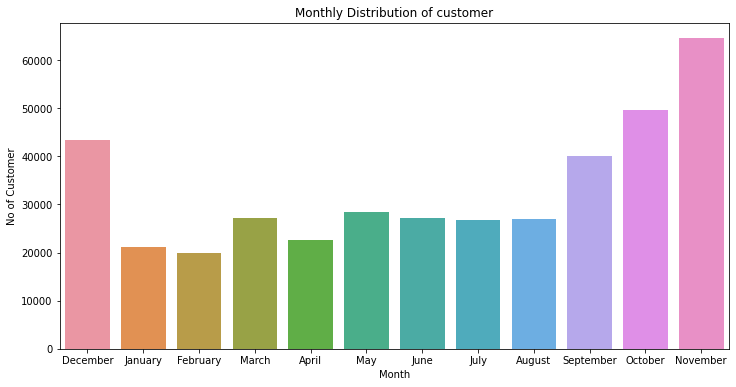

In [42]:
#Plotting the distribution on monthly basis
plt.figure(figsize=(12,6))
sns.countplot(x='Month', data=df)
plt.title("Monthly Distribution of customer")
plt.xlabel('Month')
plt.ylabel("No of Customer")
plt.show()

Text(0.5, 0, 'Week Name')

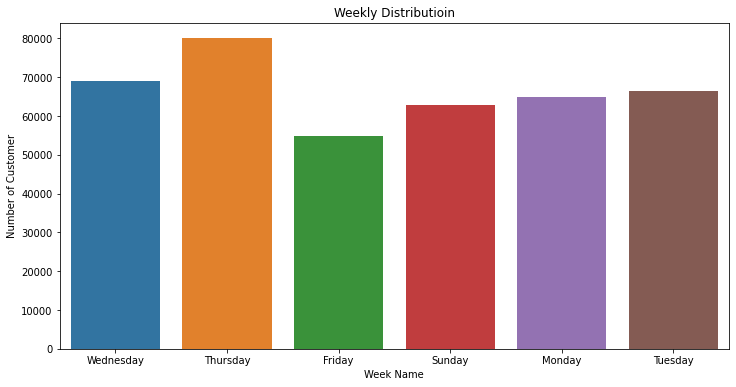

In [41]:
#Plotting the distribution of weeks
plt.figure(figsize=(12,6))
plt.title('Weekly Distributioin')
sns.countplot(x='WeekDay', data=df)
plt.ylabel('Number of Customer')
plt.xlabel('Week Name')

Text(0, 0.5, 'No of Hours')

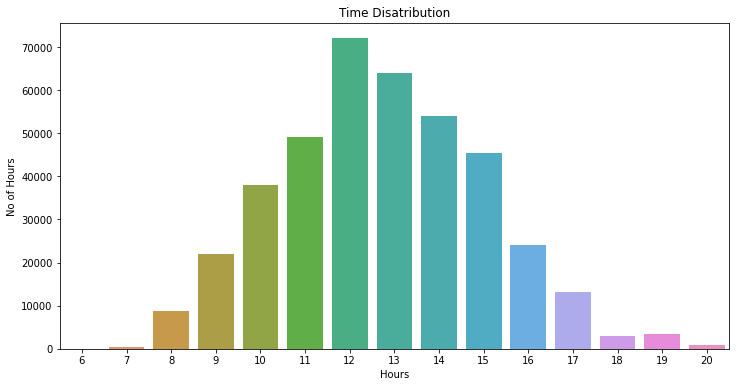

In [44]:
#Plotting time distribution
plt.figure(figsize=(12,6))
sns.countplot(x='Hour', data=df)
plt.title('Time Disatribution')
plt.xlabel('Hours')
plt.ylabel("No of Hours")

#**Model Building**

##**KMeans Implimentation**

In [ ]:
#Importing kmean and required evaluation metrics
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Month,Day,Year,Hour,Minute,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,20.34


In [ ]:
import datetime as dt

#Create last date
last_date = dt.datetime(2011,12,31)

#Feature mining
x_features = df.groupby("CustomerID").agg({'InvoiceDate':lambda x:(last_date-x.max()).days,'InvoiceNo':lambda x:len(x),'Total_Amount': lambda x:x.sum()})

#Rename the columns
x_features.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency', 'Total_Amount':'Monetary' }, inplace=True)

x_features.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,346,1,77183.60
12347.0,23,182,4310.00
12348.0,96,31,1797.24
12349.0,39,73,1757.55
12350.0,331,17,334.40


In [ ]:
#Preprocessing for k in kmeans
#x_features = df[['Total_Amount','InvoiceNo']]
scal_featues = StandardScaler()
x = scal_featues.fit_transform(x_features)
ran_n_cl = [2,3,4,5,6,7,8,9,10,11,12, 13, 14, 15,16,17,18]
for n_clusters in ran_n_cl:
  kmeans_clust = KMeans(n_clusters = n_clusters)
  pred = kmeans_clust.fit_predict(x)
  centers = kmeans_clust.cluster_centers_

  score = calinski_harabasz_score(x,pred)
  print("For n_clusters ={}, calinski harabasz score is {}".format(n_clusters,score))

For n_clusters =2, calinski harabasz score is 1938.0047427928032
For n_clusters =3, calinski harabasz score is 3007.1736878871884
For n_clusters =4, calinski harabasz score is 3249.2732757838003
For n_clusters =5, calinski harabasz score is 3683.8746513410265
For n_clusters =6, calinski harabasz score is 3890.2195166341376
For n_clusters =7, calinski harabasz score is 4164.964477798496
For n_clusters =8, calinski harabasz score is 4189.56845239901
For n_clusters =9, calinski harabasz score is 4149.304696216611
For n_clusters =10, calinski harabasz score is 4164.119743253683
For n_clusters =11, calinski harabasz score is 4355.96035514363
For n_clusters =12, calinski harabasz score is 4409.360359090336
For n_clusters =13, calinski harabasz score is 4596.041791845939
For n_clusters =14, calinski harabasz score is 4667.007531022781
For n_clusters =15, calinski harabasz score is 4959.180177622734
For n_clusters =16, calinski harabasz score is 5155.62177259558
For n_clusters =17, calinski ha

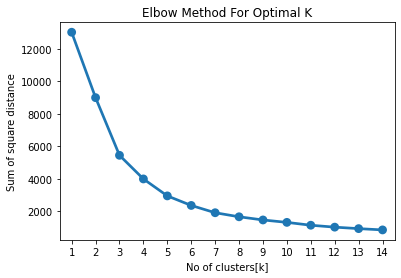

In [ ]:
#Plotting Elbow chart
sum_sq_dt = {}
for k in range(1,15):
  km = KMeans(n_clusters= k, init='k-means++', max_iter=1000)
  km = km.fit(x)
  sum_sq_dt[k] = km.inertia_

sns.pointplot(x=list(sum_sq_dt.keys()),y=list(sum_sq_dt.values()))
plt.title("Elbow Method For Optimal K")
plt.xlabel('No of clusters[k]')
plt.ylabel("Sum of square distance")
plt.show()

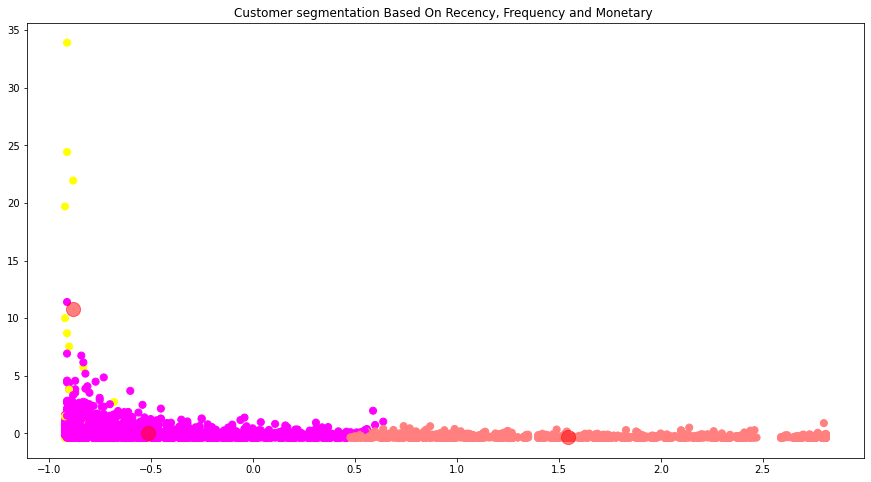

In [ ]:
#Implimenting kmeans with optimized k value
kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=1000)
y_kmeans = kmeans.fit_predict(x)

#Plotting revised k value model
plt.figure(figsize=(15,8))
plt.title('Customer segmentation Based On Recency, Frequency and Monetary ')
plt.scatter(x[:,0], x[:,1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.5)

In [ ]:
#Initializing cluster columns
x_features['Customer_Cluster'] = kmeans.labels_
x_features.head()

,Recency,Frequency,Monetary,Customer_Cluster
CustomerID,,,,
12346.0,346,1,77183.60,1
12347.0,23,182,4310.00,0
12348.0,96,31,1797.24,0
12349.0,39,73,1757.55,0
12350.0,331,17,334.40,1


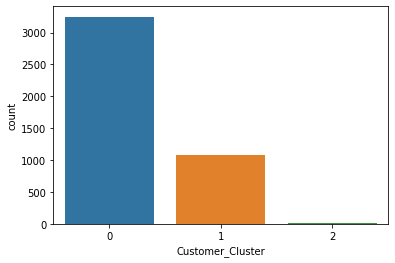

In [ ]:
#Plotting the customer segment by k means
sns.countplot(x_features['Customer_Cluster'])

##**KMeans Evaluation**

In [ ]:
labels = kmeans.labels_
print('Intertia at K =', 5, ':', kmeans.inertia_)
print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(x, labels))
print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(x, labels))
print("---------------------------------------------------------------")

Intertia at K = 5 : 5453.122484768504
Calinski-Harabasz Index: 3007.174
Davies-Bouldin Index: 0.737
---------------------------------------------------------------
